In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure #scale the view
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import f1_score
from warnings import filterwarnings
from datetime import date

In [3]:
dataImport = pd.read_csv('winequality-red.csv')
print("successfully added data!")
dataImport.head()

successfully added data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
scale = normalize(dataImport)
scale = pd.DataFrame(scale, columns=dataImport.columns)
scale.head()
print(scale.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.193478          0.018302     0.000000        0.049677   0.001987   
1       0.106989          0.012071     0.000000        0.035663   0.001344   
2       0.134949          0.013149     0.000692        0.039793   0.001592   
3       0.173611          0.004340     0.008681        0.029452   0.001163   
4       0.193478          0.018302     0.000000        0.049677   0.001987   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.287602              0.888952  0.026088  0.091771   0.014642   
1             0.342913              0.919006  0.013673  0.043893   0.009327   
2             0.259517              0.934261  0.017249  0.056402   0.011246   
3             0.263517              0.930059  0.015470  0.048983   0.008991   
4             0.287602              0.888952  0.026088  0.091771   0.014642   

    alcohol   quality  
0  0.245769  0.130728  
1  0.134

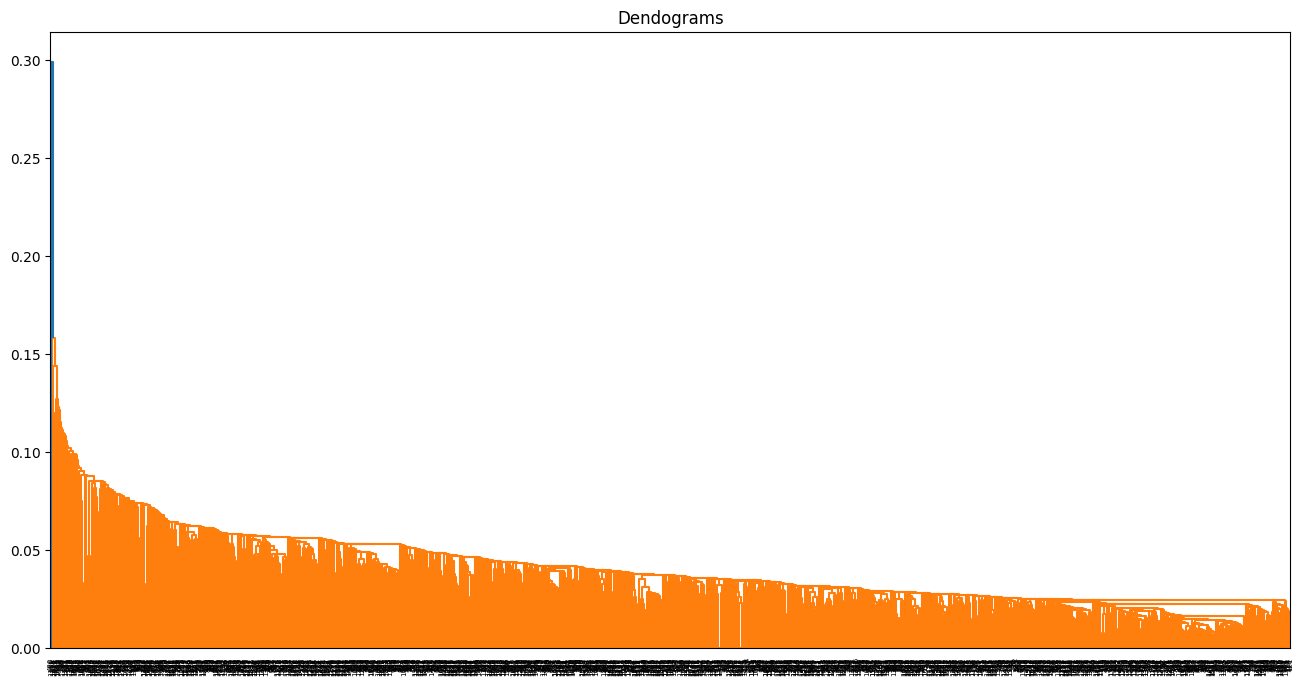

[0 0 0 ... 0 0 0]


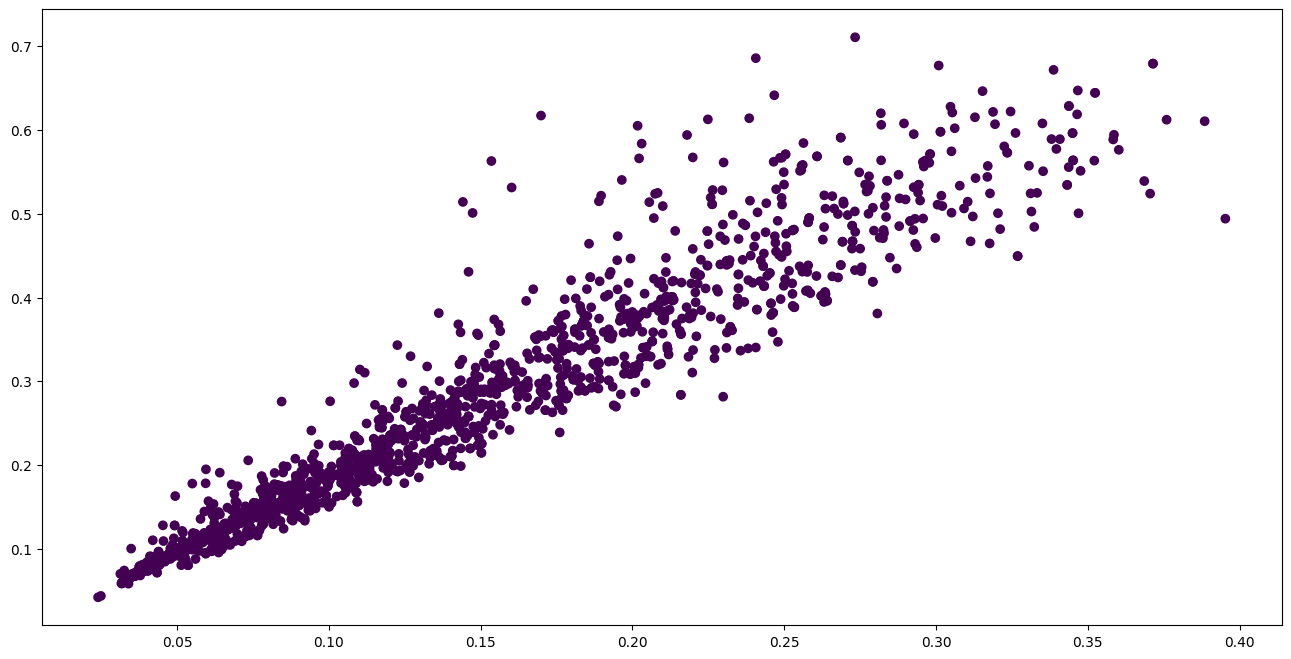

In [12]:
# SINGLE INTER-CLUSTER DISTANCE
#create dendograms with SINGLE inter-cluster distance
plt.figure(figsize=(16, 8))
plt.title("Dendograms")
dendogram = shc.dendrogram(shc.linkage(scale, method='single'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

#create clusters COMPLETE inter-cluster distance
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(scale)
print(cluster.fit_predict(scale))

# cluster dots
plt.figure(figsize=(16, 8))  
plt.scatter(scale['quality'], scale['alcohol'], c=cluster.labels_) 
plt.show()

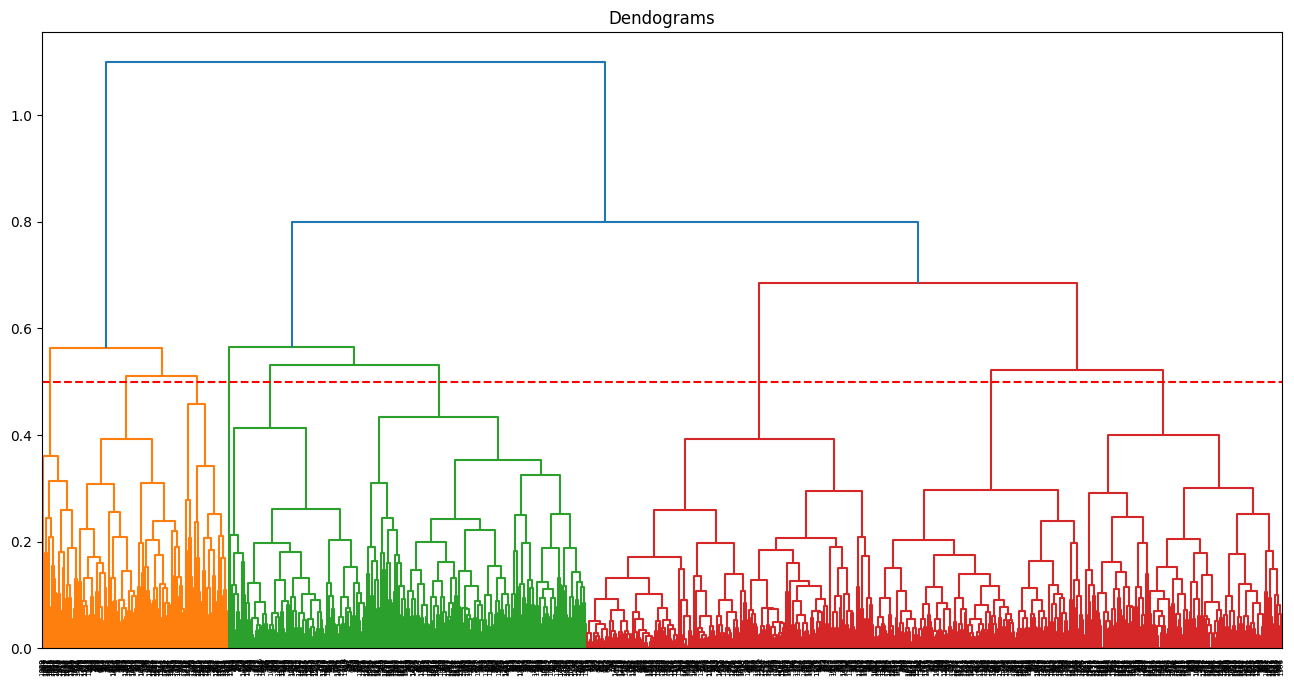

[0 0 0 ... 0 0 0]


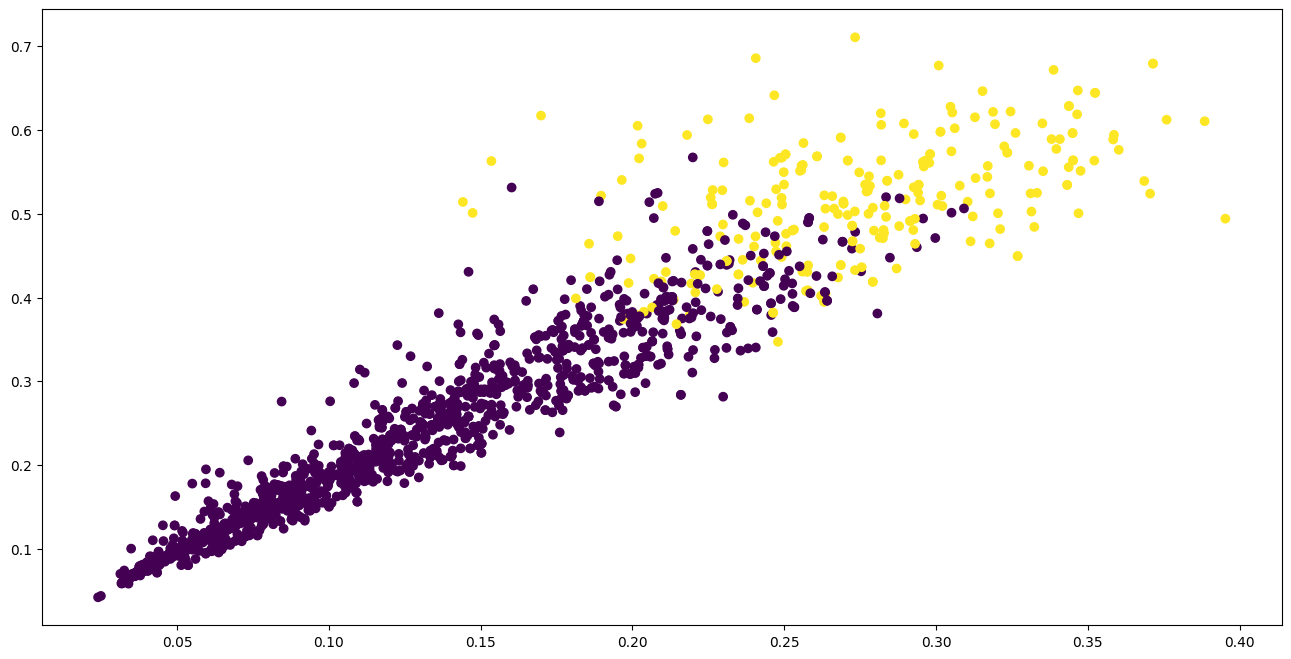

In [9]:
# COMPLETE INTER-CLUSTER DISTANCE
#create dendograms with COMPLETE inter-cluster distance
plt.figure(figsize=(16, 8))
plt.title("Dendograms")
dendogram = shc.dendrogram(shc.linkage(scale, method='complete'))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

#create clusters SINGLE inter-cluster distance
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(scale)
print(cluster.fit_predict(scale))

# cluster dots
plt.figure(figsize=(16, 8))  
plt.scatter(scale['quality'], scale['alcohol'], c=cluster.labels_) 
plt.show()

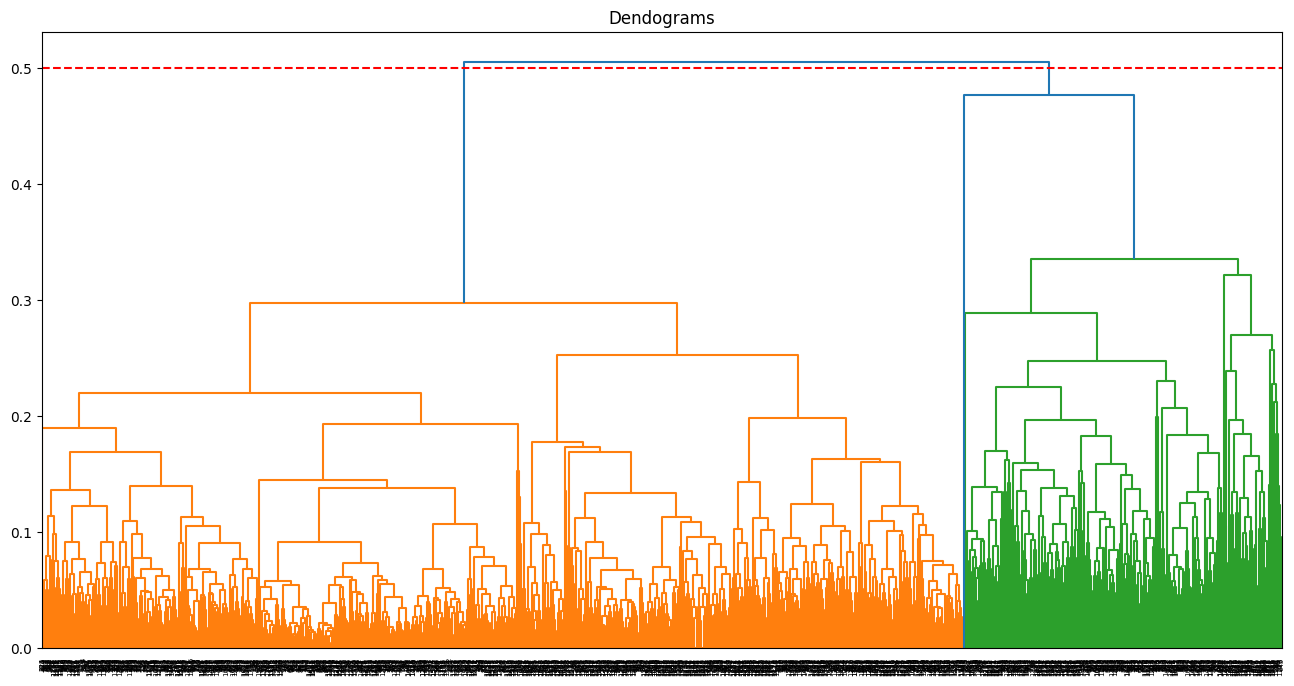

[1 1 1 ... 1 1 1]


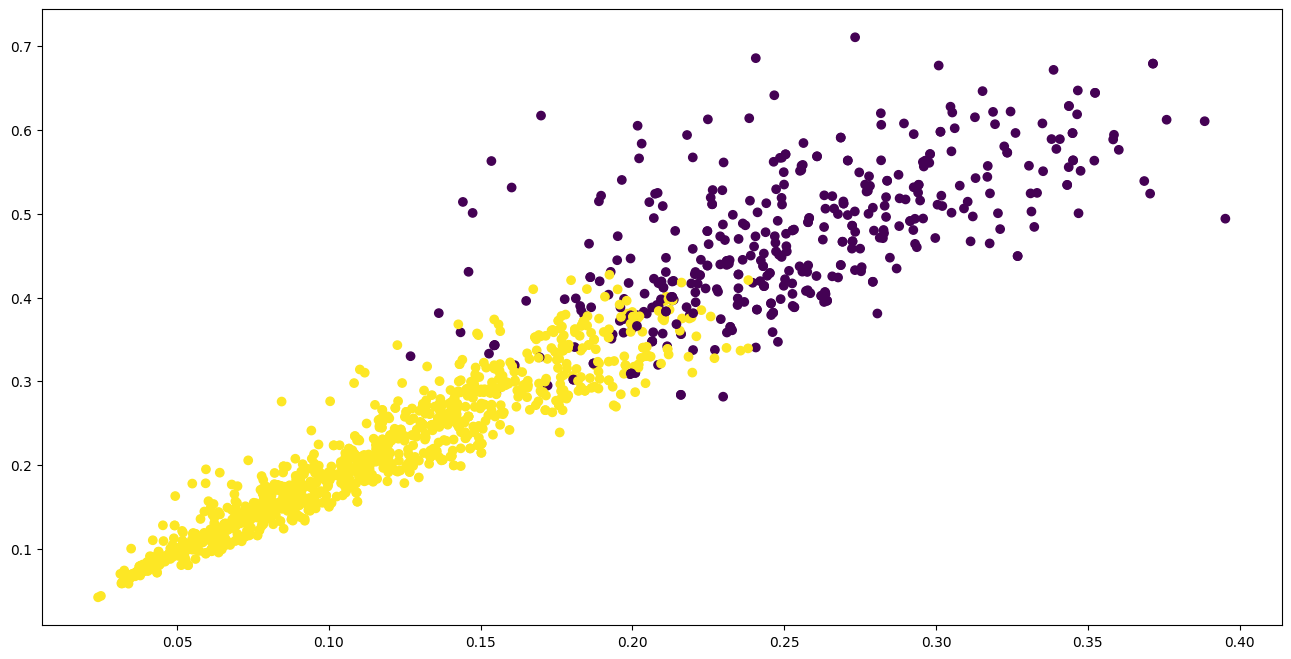

In [10]:
# AVERAGE INTER-CLUSTER DISTANCE
#create dendograms with AVERAGE inter-cluster distance
plt.figure(figsize=(16, 8))
plt.title("Dendograms")
dendogram = shc.dendrogram(shc.linkage(scale, method='average'))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

#create clusters AVERAGE inter-cluster distance
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(scale)
print(cluster.fit_predict(scale))

# cluster dots
plt.figure(figsize=(16, 8))  
plt.scatter(scale['quality'], scale['alcohol'], c=cluster.labels_) 
plt.show()